# 项目：指导四轴飞行器学会飞行

设计一个能够使四轴飞行器飞行的智能体，然后使用你选择的强化学习算法训练它！

请尝试运用你在这一单元中学到的知识，看看哪个方法效果最好，当然你也可以自己想出创新型方法并测试它们。
## 说明

请查看目录下的文件，以更好地了解项目结构。 

- `task.py`：在本文件中定义你的任务（环境）。
- `agents/`：本文件夹中包含强化学习智能体。
    - `policy_search.py`：我们为你提供了一个智能体模板。
    - `agent.py`：在本文件中开发你的智能体。
- `physics_sim.py`：本文件中包含四轴飞行器模拟器。**请勿修改本文件**。

在本项目中，你需要在 `task.py` 中定义你的任务。尽管我们为你提供了一个任务示例，来帮助你开始项目，但你也可以随意更改这个文件。在这个 notebook 中，你还将学习更多有关修改这个文件的知识。

你还需要在 `agent.py` 中设计一个强化学习智能体，来完成你选择的任务。

我们也鼓励你创建其他文件，来帮助你整理代码。比如，你也许可以通过定义一个 `model.py` 文件来定义其他你需要的神经网络结构。

## 控制四轴飞行器

在下方的代码中，我们提供了一个智能体示例，来示范如何使用模拟器来控制四轴飞行器。这个智能体比你在 notebook 中需要测试的智能体（在 `agents/policy_search.py` 中）更加简单！

这个智能体通过设置飞行器四个轴上的转速来控制飞行器。`Basic_Agent` 类中提供的智能体将会随机为四个轴指定动作。这四个速度将通过 `act` 方法以四个浮点数列表的形式返回。

在本项目中，你将在 `agents/agent.py` 中实现的智能体会以更加智能的方法进行指定的动作。

In [5]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

运行下方代码，让智能体指定动作来控制四轴飞行器。

请随意更改我们提供的 `runtime`，`init_pose`，`init_velocities` 和 `init_angle_velocities` 值来更改四轴飞行器的初始条件。

下方的 `labels` 列表为模拟数据的注释。所有的信息都储存在 `data.txt` 文档中，并保存在 `results` 目录下。

In [6]:
from imp import reload
from task import *


In [7]:
import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 10.                                     # time limit of the episode
init_pose = np.array([0., 0., 0., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

[ 0.  0. 10.]


在进行模拟时，请运行下方的代码来查看四轴飞行器的位置变化。

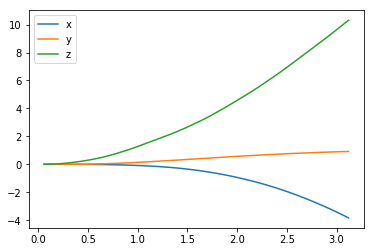

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

下方代码输出了四轴飞行器的速度。

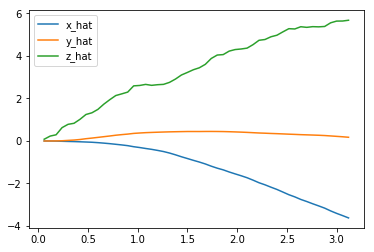

In [10]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

接下来，你可以绘制欧拉角 (Euler angles)（四轴飞行器围绕 $x$-，$y$- 和 $z$-轴的旋转）的图表，

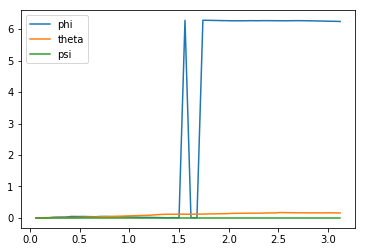

In [11]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

在绘制每个欧拉角的速度（每秒的弧度）图之前。

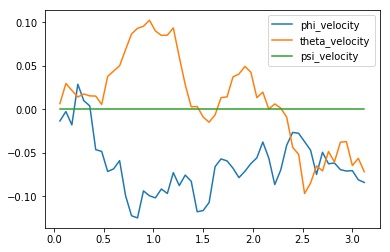

In [12]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

最后，你可以使用下方代码来输出智能体选择的动作。

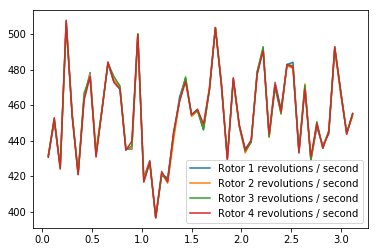

In [13]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

在指定任务之前，你需要在模拟器中衍生环境状态。运行下方代码来在模拟结束时输出以下变量值：

- `task.sim.pose`：四周飞行器在 ($x,y,z$) 坐标系中的位置和欧拉角。
- `task.sim.v`：四轴飞行器在 ($x,y,z$) 坐标系中的速度。
- `task.sim.angular_v`：三个欧拉角的弧度/每秒。

In [ ]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

在 `task.py` 中的任务示例中，我们使用了四轴飞行器六个维度的动作来构建每个时间步的环境状态。然而，你也可以按照自己的意愿更改任务，你可以添加速度信息来扩大状态向量，也可以使用任何动作、速度和角速度的组合，并构造适用于你的任务的环境状态。

## 任务

在 `task.py` 中，我们为你提供了一个任务示例。请在新窗口中打开这个文件。

使用 `__init__()` 方法来初始化指定本任务所需的几个变量。

- 模拟器作为 `PhysicsSim` 类（来自 `physics_sim.py` 文件）的示例进行初始化。
- 受到 DDPG 论文中研究方法的启发，我们使用了重复调用动作的方法。对于智能体的每一个时间步，我们将利用 `action_repeats` 时间步来进行模拟。如果你并不熟悉这种方法，可以阅读 [DDPG 论文](https://arxiv.org/abs/1509.02971)的结论部分。
- 我们设置了状态向量中每个分量的数值。在任务示例中，我们只设置了六个维度的动作信息。为了设定向量大小（`state_size`），我们必须考虑重复的动作。
- 任务环境通常是一个四维动作空间，每个轴有一个输入（`action_size=4`）。你可以设置每个输入的最小值（`action_low`）和最大值（`action_high`）。
- 我们在文件中提供的任务示例将使智能体达到目标位置。我们将目标位置设置为一个变量。

`reset()` 方法将重置模拟器。每当阶段结束时，智能体都将调用此方法。你可以查看下方代码中的例子。

`step()` 方法是最重要的一个方法。它将接收智能体选择的动作 `rotor_speeds`，并准备好下一个状态，同时返回给智能体。接着，你将通过 `get_reward()` 计算奖励值。当超过规定时间，或是四轴飞行器到达模拟器边缘时，这一阶段将视作结束。

接下来，你将学习如何测试这个任务中智能体的性能。

## 智能体

`agents/policy_search.py` 文件中提供的智能体示例使用了非常简单的线性策略，将动作向量视作状态向量和矩阵权重的点积直接进行计算。接着，它通过添加一些高斯噪声来随机干扰参数，以产生不同的策略。根据每个阶段获得的平均奖励值（`score`），它将记录迄今为止发现的最佳参数集以及分数的变化状态，并据此调整比例因子来扩大或减少噪音。

请运行下方代码来查看任务示例中智能体的性能。

In [14]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 10
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

[ 0.  0. 10.]
Episode =   10, score = -72.609 (best = -72.609), noise_scale = 1.65

这个智能体的性能想必十分糟糕！现在轮到你出场了！

## 定义任务，设计并训练你的智能体！

修改 `task.py` 文件来指定你所选择的任务。如果你不确定选择什么任务，你可以教你的四轴飞行器起飞、盘旋、着陆或是达到指定位置。


在指定任务后，使用 `agents/policy_search.py` 中的智能体示例作为模板，来在 `agents/agent.py` 中定义你自己的智能体。你可以随意从智能体示例中借用你需要的元素，包括如何模块化你的代码（使用 `act()`，`learn()` 和 `reset_episode_vars()` 等辅助方法）。

请注意，你指定的第一个智能体和任务**极有可能**无法顺利进行学习。你将需要改进不同的超参数和奖励函数，直到你能够获得不错的结果。

在开发智能体的时候，你还需要关注它的性能。参考下方代码，建立一个机制来存储每个阶段的总奖励值。如果阶段奖励值在逐渐上升，说明你的智能体正在学习。

In [2]:
#绘图
#coding:utf-8
from mpl_toolkits.mplot3d.axes3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

def plot_point3d(ax, x, y, z, **kwargs):
    ax.scatter([x], [y], [z], **kwargs)
    ax.text(x, y, z, "({:.1f}, {:.1f}, {:.1f})".format(x, y, z))

def show_path(results, target=None):
    results = np.array(results)    
    fig = plt.figure(figsize=(10,10))
    ax = fig.gca(projection='3d')
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_zlabel('Z-axis')
    ax.plot3D(results[:, 0], results[:, 1], results[:, 2], 'gray')   
    if target is not None:
        plot_point3d(ax, *target[0:3], c='y', marker='x', s=100, label='target')   
        plot_point3d(ax, *results[0, 0:3], c='g', marker='o', s=50, label='start')
        plot_point3d(ax, *results[-1, 0:3], c='r', marker='o', s=50, label='end')    
    ax.legend()
    
def plot_show(results, standalone=True):
    if standalone:
        plt.subplots(figsize=(15, 15))    
    #查看四轴飞行器的位置变化
    plt.subplot(3, 3, 1)
    plt.title('Position')
    plt.plot(results['time'], results['x'], label='x')
    plt.plot(results['time'], results['y'], label='y')
    plt.plot(results['time'], results['z'], label='z')
    plt.xlabel('time, seconds')
    plt.ylabel('Position')
    plt.grid(True)

    #四轴飞行器的速度
    plt.subplot(3, 3, 2)
    plt.title('Velocity')
    plt.plot(results['time'], results['x_velocity'], label='x_hat')
    plt.plot(results['time'], results['y_velocity'], label='y_hat')
    plt.plot(results['time'], results['z_velocity'], label='z_hat')
    plt.xlabel('time, seconds')
    plt.ylabel('Velocity')
    plt.grid(True)
    #四轴飞行器的转子速度
    plt.subplot(3, 3, 3)
    plt.title('zhuanzi-v')
    plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1')
    plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2')
    plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3')
    plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4')
    plt.xlabel('time, seconds')
    plt.ylabel('zhuanzi-v, revolutions / second')
    plt.grid(True)
    plt.show()

In [1]:
## TODO: Train your agent here.
import sys
import pandas as pd
from agents.agent import DDPG
from task import Task
import numpy as np

num_episodes = 2000
target_pos = np.array([0., 0., 10.])
init_pose = np.array([0., 0., 1., 0., 0., 0.])
task = Task(init_pose = init_pose, target_pos=target_pos)
agent = DDPG(task)
total_reward = 0
best_reward = -float("inf")
#labels = ['eps','sum_sum', 'x', 'y', 'z']
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
all_results = []
plot_data = {x : [] for x in ['episode', 'total_reward']}
last_zpose = 0

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    results = {x : [] for x in labels}
    while True:
        rotor_speeds = agent.act(state)
        next_state, reward, done= task.step(rotor_speeds)
        agent.step(action=rotor_speeds, reward=reward, next_state=next_state, done=done)
        state = next_state
        total_reward += reward
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        if reward > best_reward:
            best_reward = reward
        if done:
            print("\rEpisode = {:4d} Reward = {:4f} sum Reward = {:4f} \n".format(i_episode, best_reward,
                                                                                  total_reward),task.sim.pose[:3], "\n", end=" ")
            all_results.append(results)
            plot_data['episode'].append(i_episode)
            plot_data['total_reward'].append(total_reward)
            total_reward=0
            break
    sys.stdout.flush()

Using TensorFlow backend.


[ 0.  0. 10.]
Episode =    1 Reward = -27.499493 sum Reward = -454.891502 
 [0.01780183 0.12281089 0.        ] 
Episode =    2 Reward = -27.477471 sum Reward = -492.116935 
 [0.18804367 0.26419687 0.        ] 
Episode =    3 Reward = -27.477471 sum Reward = -499.696621 
 [0.20396943 0.25598484 0.        ] 
Episode =    4 Reward = -27.477471 sum Reward = -474.587369 
 [-0.21171978  0.2734509   0.        ] 
Episode =    5 Reward = -27.477471 sum Reward = -550.266308 
 [0.17917503 0.17874913 0.        ] 
Episode =    6 Reward = -27.475374 sum Reward = -566.611779 
 [0.05189589 0.28156932 0.        ] 
Episode =    7 Reward = -27.474953 sum Reward = -486.663902 
 [0.24716653 0.04080235 0.        ] 
Episode =    8 Reward = -27.474953 sum Reward = -467.319468 
 [0.16576544 0.18602542 0.        ] 
Episode =    9 Reward = -27.469711 sum Reward = -590.611926 
 [0.49018747 0.32494809 0.        ] 
Episode =   10 Reward = -27.468731 sum Reward = -540.598715 
 [0.17686471 0.21057438 0.        ] 
Epi

Episode =   83 Reward = -26.977207 sum Reward = -489.825905 
 [-0.37906163 -0.42473156  0.        ] 
Episode =   84 Reward = -26.977207 sum Reward = -527.755154 
 [-0.6152865  -0.22425411  0.        ] 
Episode =   85 Reward = -26.977207 sum Reward = -593.901076 
 [-0.13237464  0.08774445  0.        ] 
Episode =   86 Reward = -26.977207 sum Reward = -608.101440 
 [-0.15683218  0.16379305  0.        ] 
Episode =   87 Reward = -26.977207 sum Reward = -599.876638 
 [0.0775409  0.08686271 0.        ] 
Episode =   88 Reward = -26.977207 sum Reward = -540.784879 
 [-0.1084136  -0.08489968  0.        ] 
Episode =   89 Reward = -26.977207 sum Reward = -504.048326 
 [-0.25555992  0.10794343  0.        ] 
Episode =   90 Reward = -26.977207 sum Reward = -609.984227 
 [-0.10716584  0.11179389  0.        ] 
Episode =   91 Reward = -26.977207 sum Reward = -631.071524 
 [0.03322212 0.01589141 0.        ] 
Episode =   92 Reward = -26.977207 sum Reward = -525.266696 
 [-0.23139552 -0.11979684  0.       

Episode =  165 Reward = -26.977207 sum Reward = -702.289717 
 [0.16139017 0.34837479 0.        ] 
Episode =  166 Reward = -26.977207 sum Reward = -803.475172 
 [0.2516809  0.10298957 0.        ] 
Episode =  167 Reward = -26.977207 sum Reward = -696.472137 
 [0.33132842 0.28569352 0.        ] 
Episode =  168 Reward = -26.977207 sum Reward = -823.621107 
 [0.3394688  0.39341418 0.        ] 
Episode =  169 Reward = -26.977207 sum Reward = -695.965004 
 [0.11971646 0.13538437 0.        ] 
Episode =  170 Reward = -26.977207 sum Reward = -712.726396 
 [-0.02350275  0.16391348  0.        ] 
Episode =  171 Reward = -26.977207 sum Reward = -706.809907 
 [-0.26778945  0.17547627  0.        ] 
Episode =  172 Reward = -26.977207 sum Reward = -707.154796 
 [-0.01364699  0.14458526  0.        ] 
Episode =  173 Reward = -26.977207 sum Reward = -594.263722 
 [0.00255351 0.16978914 0.        ] 
Episode =  174 Reward = -26.977207 sum Reward = -708.644648 
 [-0.13116442  0.04460454  0.        ] 
Episode 

Episode =  247 Reward = -26.977207 sum Reward = -692.915325 
 [-0.43897042 -0.25191129  0.        ] 
Episode =  248 Reward = -26.977207 sum Reward = -572.320723 
 [-0.124398   -0.21154762  0.        ] 
Episode =  249 Reward = -26.977207 sum Reward = -676.142460 
 [-0.10822571 -0.47210082  0.        ] 
Episode =  250 Reward = -26.977207 sum Reward = -688.239836 
 [-0.33976237 -0.06347767  0.        ] 
Episode =  251 Reward = -26.977207 sum Reward = -581.382280 
 [ 0.08022509 -0.21206897  0.        ] 
Episode =  252 Reward = -26.977207 sum Reward = -684.964327 
 [ 0.13031002 -0.34476754  0.        ] 
Episode =  253 Reward = -26.977207 sum Reward = -572.238333 
 [ 0.06220035 -0.35040628  0.        ] 
Episode =  254 Reward = -26.977207 sum Reward = -772.678307 
 [-0.05251898 -0.57383484  0.        ] 
Episode =  255 Reward = -26.977207 sum Reward = -773.959912 
 [-0.46272424 -0.28259114  0.        ] 
Episode =  256 Reward = -26.977207 sum Reward = -874.574804 
 [-0.00819361 -0.3038513   0. 

Episode =  329 Reward = -26.977207 sum Reward = -786.002086 
 [-0.14119827  0.31485901  0.        ] 
Episode =  330 Reward = -26.977207 sum Reward = -672.693232 
 [-0.79176233 -0.12374839  0.        ] 
Episode =  331 Reward = -26.977207 sum Reward = -686.113373 
 [-0.31565471 -0.15430378  0.        ] 
Episode =  332 Reward = -26.977207 sum Reward = -574.538239 
 [-0.61364187  0.0849239   0.        ] 
Episode =  333 Reward = -26.977207 sum Reward = -780.972688 
 [-0.46407796  0.07170592  0.        ] 
Episode =  334 Reward = -26.977207 sum Reward = -663.867975 
 [-0.71492184  0.08672956  0.        ] 
Episode =  335 Reward = -26.977207 sum Reward = -661.300325 
 [-0.69896252 -0.1375793   0.        ] 
Episode =  336 Reward = -26.977207 sum Reward = -675.662149 
 [-0.35252755 -0.31054313  0.        ] 
Episode =  337 Reward = -26.977207 sum Reward = -775.886568 
 [-0.976378    0.00962655  0.        ] 
Episode =  338 Reward = -26.977207 sum Reward = -673.233997 
 [-0.45428964 -0.07526957  0. 

Episode =  411 Reward = -26.977207 sum Reward = -694.810432 
 [ 0.016737   -0.03216224  0.        ] 
Episode =  412 Reward = -26.977207 sum Reward = -683.559422 
 [ 0.23797075 -0.11032325  0.        ] 
Episode =  413 Reward = -26.977207 sum Reward = -684.863805 
 [-0.13365004 -0.21482133  0.        ] 
Episode =  414 Reward = -26.977207 sum Reward = -681.257800 
 [-0.12073089 -0.29500051  0.        ] 
Episode =  415 Reward = -26.977207 sum Reward = -830.391779 
 [-0.29841436  0.1060871   0.        ] 
Episode =  416 Reward = -26.977207 sum Reward = -794.949412 
 [ 0.12468242 -0.29563987  0.        ] 
Episode =  417 Reward = -26.977207 sum Reward = -816.444402 
 [0.3500095 0.1789134 0.       ] 
Episode =  418 Reward = -26.977207 sum Reward = -877.390483 
 [-0.99340697 -0.05635946  0.        ] 
Episode =  419 Reward = -26.977207 sum Reward = -684.587158 
 [ 0.10019646 -0.09763923  0.        ] 
Episode =  420 Reward = -26.977207 sum Reward = -797.297283 
 [0.07259968 0.24367718 0.        ] 

Episode =  493 Reward = -26.977207 sum Reward = -730.944411 
 [ 0.27842181 -0.34770965  0.        ] 
Episode =  494 Reward = -26.977207 sum Reward = -714.195585 
 [ 0.15131774 -0.27974895  0.        ] 
Episode =  495 Reward = -26.977207 sum Reward = -824.443843 
 [-0.24519111 -0.39154131  0.        ] 
Episode =  496 Reward = -26.977207 sum Reward = -805.279886 
 [-0.00258543 -0.00358899  0.        ] 
Episode =  497 Reward = -26.977207 sum Reward = -815.837323 
 [-0.32325845 -0.32032854  0.        ] 
Episode =  498 Reward = -26.977207 sum Reward = -695.478706 
 [-0.13915686  0.15406988  0.        ] 
Episode =  499 Reward = -26.977207 sum Reward = -817.677908 
 [-0.31718522  0.01152214  0.        ] 
Episode =  500 Reward = -26.977207 sum Reward = -803.306984 
 [-0.72854955 -0.08962973  0.        ] 
Episode =  501 Reward = -26.977207 sum Reward = -793.952194 
 [-0.66872822 -0.27106219  0.        ] 
Episode =  502 Reward = -26.977207 sum Reward = -729.701551 
 [-0.41448033  0.07818579  0. 

Episode =  575 Reward = -26.977207 sum Reward = -715.127514 
 [ 0.29359768 -0.5192061   0.        ] 
Episode =  576 Reward = -26.977207 sum Reward = -875.075998 
 [ 0.14828818 -0.14851891  0.        ] 
Episode =  577 Reward = -26.977207 sum Reward = -849.464941 
 [-0.16298536  0.07954366  0.        ] 
Episode =  578 Reward = -26.977207 sum Reward = -842.781752 
 [ 0.23605669 -0.43082003  0.        ] 
Episode =  579 Reward = -26.977207 sum Reward = -870.581868 
 [ 0.00366318 -0.06657933  0.        ] 
Episode =  580 Reward = -26.977207 sum Reward = -861.311852 
 [-0.35845316  0.26422227  0.        ] 
Episode =  581 Reward = -26.977207 sum Reward = -957.502154 
 [0.02336656 0.0319093  0.        ] 
Episode =  582 Reward = -26.977207 sum Reward = -808.722247 
 [-0.33055194  0.03091634  0.        ] 
Episode =  583 Reward = -26.977207 sum Reward = -975.376519 
 [-0.1637745  -0.15112364  0.        ] 
Episode =  584 Reward = -26.977207 sum Reward = -814.572440 
 [-0.353169   0.0890892  0.      

Episode =  657 Reward = -26.977207 sum Reward = -926.940254 
 [-0.37399022 -0.31223562  0.        ] 
Episode =  658 Reward = -26.977207 sum Reward = -791.580584 
 [-0.02682318  0.1111416   0.        ] 
Episode =  659 Reward = -26.977207 sum Reward = -829.634764 
 [ 0.16031531 -0.0648486   0.        ] 
Episode =  660 Reward = -26.977207 sum Reward = -910.695464 
 [ 0.28039123 -0.05189975  0.        ] 
Episode =  661 Reward = -26.977207 sum Reward = -918.032146 
 [ 0.17127663 -0.05431159  0.        ] 
Episode =  662 Reward = -26.977207 sum Reward = -905.677548 
 [-0.11065575 -0.07374866  0.        ] 
Episode =  663 Reward = -26.977207 sum Reward = -817.813440 
 [-0.0878057   0.06223283  0.        ] 
Episode =  664 Reward = -26.977207 sum Reward = -985.059132 
 [ 0.71774392 -0.58191943  0.        ] 
Episode =  665 Reward = -26.977207 sum Reward = -754.709171 
 [ 0.11167355 -0.16090906  0.        ] 
Episode =  666 Reward = -26.977207 sum Reward = -926.061649 
 [0.55309908 0.40391609 0.    

Episode =  739 Reward = -26.977207 sum Reward = -968.312014 
 [0.79214187 0.30430584 0.        ] 
Episode =  740 Reward = -26.977207 sum Reward = -792.498440 
 [0.0955155  0.34256782 0.        ] 
Episode =  741 Reward = -26.977207 sum Reward = -895.383566 
 [-0.42200586 -0.10291061  0.        ] 
Episode =  742 Reward = -26.977207 sum Reward = -893.337526 
 [-0.03603147 -0.41597497  0.        ] 
Episode =  743 Reward = -26.977207 sum Reward = -785.955144 
 [ 0.37107085 -0.04353188  0.        ] 
Episode =  744 Reward = -26.977207 sum Reward = -782.348473 
 [ 0.09753913 -0.16235931  0.        ] 
Episode =  745 Reward = -26.977207 sum Reward = -978.217442 
 [-0.08821405 -0.05286295  0.        ] 
Episode =  746 Reward = -26.977207 sum Reward = -920.820816 
 [-0.27908045 -0.32104793  0.        ] 
Episode =  747 Reward = -26.977207 sum Reward = -941.227030 
 [0.06570338 0.01292397 0.        ] 
Episode =  748 Reward = -26.977207 sum Reward = -667.135753 
 [ 0.39578867 -0.04460798  0.        ] 

Episode =  821 Reward = -26.977207 sum Reward = -653.795072 
 [0.0866631  0.17965643 0.        ] 
Episode =  822 Reward = -26.977207 sum Reward = -871.688670 
 [ 0.12211884 -0.03969524  0.        ] 
Episode =  823 Reward = -26.977207 sum Reward = -709.751304 
 [ 0.25344968 -0.20684974  0.        ] 
Episode =  824 Reward = -26.977207 sum Reward = -1151.090682 
 [-0.41326672  0.16529715  0.        ] 
Episode =  825 Reward = -26.977207 sum Reward = -893.958465 
 [ 0.30753753 -0.25397586  0.        ] 
Episode =  826 Reward = -26.977207 sum Reward = -788.563504 
 [-0.04726055 -0.26003419  0.        ] 
Episode =  827 Reward = -26.977207 sum Reward = -902.050997 
 [ 0.56872929 -0.31424697  0.        ] 
Episode =  828 Reward = -26.977207 sum Reward = -751.187221 
 [ 0.33613093 -0.04287751  0.        ] 
Episode =  829 Reward = -26.977207 sum Reward = -1081.384350 
 [-0.51234649 -0.0064212   0.        ] 
Episode =  830 Reward = -26.977207 sum Reward = -1002.281213 
 [-0.03948905 -0.32611713  0. 

Episode =  903 Reward = -26.977207 sum Reward = -642.838555 
 [0.24905314 0.1680859  0.        ] 
Episode =  904 Reward = -26.977207 sum Reward = -864.481031 
 [-0.24789391 -0.30228584  0.        ] 
Episode =  905 Reward = -26.977207 sum Reward = -731.665657 
 [-0.52067895 -0.03264268  0.        ] 
Episode =  906 Reward = -26.977207 sum Reward = -777.167154 
 [-0.04049254 -0.15746351  0.        ] 
Episode =  907 Reward = -26.977207 sum Reward = -1008.742976 
 [0.39506377 0.21194177 0.        ] 
Episode =  908 Reward = -26.977207 sum Reward = -919.144497 
 [0.08997242 0.11514491 0.        ] 
Episode =  909 Reward = -26.977207 sum Reward = -785.230688 
 [-0.12452378  0.25047679  0.        ] 
Episode =  910 Reward = -26.977207 sum Reward = -948.275853 
 [0.36268716 0.23560408 0.        ] 
Episode =  911 Reward = -26.977207 sum Reward = -755.658169 
 [0.33134808 0.0247268  0.        ] 
Episode =  912 Reward = -26.977207 sum Reward = -762.922779 
 [-0.47269748  0.35576088  0.        ] 
Epis

Episode =  985 Reward = -26.977207 sum Reward = -928.170803 
 [-0.65939882 -0.10472299  0.        ] 
Episode =  986 Reward = -26.977207 sum Reward = -807.243494 
 [-0.30563346  0.27594077  0.        ] 
Episode =  987 Reward = -26.977207 sum Reward = -923.581519 
 [-0.87276964 -0.3616799   0.        ] 
Episode =  988 Reward = -26.977207 sum Reward = -786.124562 
 [0.02888364 0.28467411 0.        ] 
Episode =  989 Reward = -26.977207 sum Reward = -830.662628 
 [-0.14756684  0.18207626  0.        ] 
Episode =  990 Reward = -26.977207 sum Reward = -770.313009 
 [0.28117517 0.03667392 0.        ] 
Episode =  991 Reward = -26.977207 sum Reward = -936.122916 
 [ 0.34242859 -0.03180319  0.        ] 
Episode =  992 Reward = -26.977207 sum Reward = -927.410759 
 [-0.22316624 -0.01628071  0.        ] 
Episode =  993 Reward = -26.977207 sum Reward = -727.529814 
 [0.07705699 0.31548906 0.        ] 
Episode =  994 Reward = -26.977207 sum Reward = -646.018264 
 [-0.01040999  0.16508575  0.        ] 

Episode = 1068 Reward = -26.977207 sum Reward = -678.564801 
 [-0.14880073 -0.05012228  0.        ] 
Episode = 1069 Reward = -26.977207 sum Reward = -799.600904 
 [0.03612038 0.22986977 0.        ] 
Episode = 1070 Reward = -26.977207 sum Reward = -673.860537 
 [ 0.25636764 -0.0291612   0.        ] 
Episode = 1071 Reward = -26.977207 sum Reward = -997.143923 
 [ 0.3292234  -0.17794597  0.        ] 
Episode = 1072 Reward = -26.977207 sum Reward = -864.921503 
 [0.15114148 0.22851564 0.        ] 
Episode = 1073 Reward = -26.977207 sum Reward = -821.626723 
 [-0.27833159  0.41790775  0.        ] 
Episode = 1074 Reward = -26.977207 sum Reward = -564.361521 
 [0.26390576 0.18342196 0.        ] 
Episode = 1075 Reward = -26.977207 sum Reward = -958.108455 
 [0.14497531 0.41543276 0.        ] 
Episode = 1076 Reward = -26.977207 sum Reward = -731.413155 
 [0.24086587 0.08565602 0.        ] 
Episode = 1077 Reward = -26.977207 sum Reward = -734.644937 
 [0.32996814 0.06617313 0.        ] 
Episode 

Episode = 1150 Reward = -26.977207 sum Reward = -722.957344 
 [-0.60774562 -0.00657736  0.        ] 
Episode = 1151 Reward = -26.977207 sum Reward = -653.754093 
 [0.0838479 0.3496234 0.       ] 
Episode = 1152 Reward = -26.977207 sum Reward = -741.789010 
 [0.07278253 0.42932268 0.        ] 
Episode = 1153 Reward = -26.977207 sum Reward = -740.753378 
 [0.19912419 0.27478025 0.        ] 
Episode = 1154 Reward = -26.977207 sum Reward = -662.868461 
 [-0.05045717  0.15861433  0.        ] 
Episode = 1155 Reward = -26.977207 sum Reward = -588.703537 
 [0.43445988 0.26824819 0.        ] 
Episode = 1156 Reward = -26.977207 sum Reward = -764.509578 
 [-0.01282155  0.34360415  0.        ] 
Episode = 1157 Reward = -26.977207 sum Reward = -748.911057 
 [0.22536846 0.10527374 0.        ] 
Episode = 1158 Reward = -26.977207 sum Reward = -770.478909 
 [ 0.23700617 -0.08715946  0.        ] 
Episode = 1159 Reward = -26.977207 sum Reward = -875.971770 
 [ 0.20613261 -0.09202091  0.        ] 
Episode 

Episode = 1232 Reward = -26.977207 sum Reward = -730.676847 
 [0.3031242  0.13241607 0.        ] 
Episode = 1233 Reward = -26.977207 sum Reward = -735.946642 
 [-0.12156337  0.35336189  0.        ] 
Episode = 1234 Reward = -26.977207 sum Reward = -747.999946 
 [-0.19357545  0.21656538  0.        ] 
Episode = 1235 Reward = -26.977207 sum Reward = -676.013683 
 [-0.04628375  0.16734935  0.        ] 
Episode = 1236 Reward = -26.977207 sum Reward = -779.735386 
 [0.05931309 0.12652672 0.        ] 
Episode = 1237 Reward = -26.977207 sum Reward = -720.822680 
 [0.12898711 0.23668933 0.        ] 
Episode = 1238 Reward = -26.977207 sum Reward = -769.958814 
 [0.27643891 0.21802332 0.        ] 
Episode = 1239 Reward = -26.977207 sum Reward = -645.034786 
 [0.17776031 0.27096119 0.        ] 
Episode = 1240 Reward = -26.977207 sum Reward = -810.832714 
 [-0.02662955  0.13240673  0.        ] 
Episode = 1241 Reward = -26.977207 sum Reward = -760.172036 
 [-0.23846336 -0.0722935   0.        ] 
Episo

Episode = 1314 Reward = -26.977207 sum Reward = -474.967492 
 [0.18351349 0.0067824  0.        ] 
Episode = 1315 Reward = -26.977207 sum Reward = -682.988811 
 [-0.22971861 -0.0342095   0.        ] 
Episode = 1316 Reward = -26.977207 sum Reward = -616.163489 
 [-0.24182727  0.05311347  0.        ] 
Episode = 1317 Reward = -26.977207 sum Reward = -625.196807 
 [ 0.00410327 -0.15309398  0.        ] 
Episode = 1318 Reward = -26.977207 sum Reward = -517.553648 
 [0.08219987 0.10140858 0.        ] 
Episode = 1319 Reward = -26.977207 sum Reward = -736.810680 
 [0.06007667 0.40898047 0.        ] 
Episode = 1320 Reward = -26.977207 sum Reward = -689.854583 
 [ 0.30027016 -0.03615392  0.        ] 
Episode = 1321 Reward = -26.977207 sum Reward = -926.944636 
 [-0.33975681 -0.46198136  0.        ] 
Episode = 1322 Reward = -26.977207 sum Reward = -617.153077 
 [-0.00144262 -0.05250789  0.        ] 
Episode = 1323 Reward = -26.977207 sum Reward = -700.445692 
 [-0.05369384 -0.14625371  0.        ] 

Episode = 1396 Reward = -26.977207 sum Reward = -680.441778 
 [ 0.21167602 -0.49291085  0.        ] 
Episode = 1397 Reward = -26.977207 sum Reward = -669.087367 
 [-0.78351551  0.01112984  0.        ] 
Episode = 1398 Reward = -26.977207 sum Reward = -762.965940 
 [ 0.2356708  -0.22303187  0.        ] 
Episode = 1399 Reward = -26.977207 sum Reward = -708.591611 
 [-0.21088902 -0.44739079  0.        ] 
Episode = 1400 Reward = -26.977207 sum Reward = -870.226663 
 [0.75695234 0.3719883  0.        ] 
Episode = 1401 Reward = -26.977207 sum Reward = -937.480748 
 [0.14948341 0.13884909 0.        ] 
Episode = 1402 Reward = -26.977207 sum Reward = -749.553106 
 [0.35534841 0.0742175  0.        ] 
Episode = 1403 Reward = -26.977207 sum Reward = -811.055558 
 [0.54193877 0.15784239 0.        ] 
Episode = 1404 Reward = -26.977207 sum Reward = -760.087916 
 [0.40049708 0.19789302 0.        ] 
Episode = 1405 Reward = -26.977207 sum Reward = -811.724574 
 [ 0.49341093 -0.23188535  0.        ] 
Episo

Episode = 1478 Reward = -26.977207 sum Reward = -821.986470 
 [-0.37072964 -0.42155627  0.        ] 
Episode = 1479 Reward = -26.977207 sum Reward = -760.749200 
 [-0.39893311 -0.14675981  0.        ] 
Episode = 1480 Reward = -26.977207 sum Reward = -1054.955695 
 [-0.14932484  0.12388372  0.        ] 
Episode = 1481 Reward = -26.977207 sum Reward = -712.309663 
 [-0.29697551  0.28407029  0.        ] 
Episode = 1482 Reward = -26.977207 sum Reward = -926.650384 
 [-0.0833006  -0.43650653  0.        ] 
Episode = 1483 Reward = -26.977207 sum Reward = -629.421040 
 [ 0.0057662  -0.09192038  0.        ] 
Episode = 1484 Reward = -26.977207 sum Reward = -898.730016 
 [ 0.14813809 -0.12648196  0.        ] 
Episode = 1485 Reward = -26.977207 sum Reward = -663.791224 
 [ 0.69614207 -0.01381144  0.        ] 
Episode = 1486 Reward = -26.977207 sum Reward = -801.702434 
 [ 0.84448922 -0.31236775  0.        ] 
Episode = 1487 Reward = -26.977207 sum Reward = -675.635433 
 [0.11314874 0.23144589 0.   

Episode = 1560 Reward = -26.977207 sum Reward = -742.493158 
 [ 0.24704038 -0.30475429  0.        ] 
Episode = 1561 Reward = -26.977207 sum Reward = -831.007431 
 [-0.05004351  0.10206273  0.        ] 
Episode = 1562 Reward = -26.977207 sum Reward = -816.090000 
 [ 0.11210372 -0.08703919  0.        ] 
Episode = 1563 Reward = -26.977207 sum Reward = -730.845878 
 [-0.09036571  0.03492242  0.        ] 
Episode = 1564 Reward = -26.977207 sum Reward = -614.434469 
 [ 0.58865995 -0.1224339   0.        ] 
Episode = 1565 Reward = -26.977207 sum Reward = -735.545965 
 [ 0.23876722 -0.39602175  0.        ] 
Episode = 1566 Reward = -26.977207 sum Reward = -759.652044 
 [ 0.38542596 -0.04509407  0.        ] 
Episode = 1567 Reward = -26.977207 sum Reward = -624.191320 
 [0.12805596 0.16828508 0.        ] 
Episode = 1568 Reward = -26.977207 sum Reward = -739.205606 
 [ 0.40427225 -0.20500812  0.        ] 
Episode = 1569 Reward = -26.977207 sum Reward = -653.842250 
 [0.44530645 0.21671712 0.       

Episode = 1642 Reward = -26.977207 sum Reward = -629.012266 
 [0.04278391 0.25412306 0.        ] 
Episode = 1643 Reward = -26.977207 sum Reward = -635.541154 
 [0.75391363 0.30384791 0.        ] 
Episode = 1644 Reward = -26.977207 sum Reward = -601.279693 
 [ 0.24847512 -0.26772611  0.        ] 
Episode = 1645 Reward = -26.977207 sum Reward = -593.383435 
 [-0.02274668 -0.08049012  0.        ] 
Episode = 1646 Reward = -26.977207 sum Reward = -600.979356 
 [ 0.55231483 -0.04990116  0.        ] 
Episode = 1647 Reward = -26.977207 sum Reward = -802.902198 
 [-0.11598086  0.20378293  0.        ] 
Episode = 1648 Reward = -26.977207 sum Reward = -616.684451 
 [-0.08431091 -0.20957599  0.        ] 
Episode = 1649 Reward = -26.977207 sum Reward = -630.592856 
 [-0.26031368 -0.06824104  0.        ] 
Episode = 1650 Reward = -26.977207 sum Reward = -513.864299 
 [ 0.39138166 -0.24772124  0.        ] 
Episode = 1651 Reward = -26.977207 sum Reward = -777.624600 
 [ 0.03656474 -0.65942413  0.       

Episode = 1724 Reward = -26.977207 sum Reward = -877.448533 
 [ 0.26398654 -0.3051426   0.        ] 
Episode = 1725 Reward = -26.977207 sum Reward = -700.031315 
 [-0.33215625  0.20327483  0.        ] 
Episode = 1726 Reward = -26.977207 sum Reward = -760.444260 
 [ 0.21991906 -0.26330921  0.        ] 
Episode = 1727 Reward = -26.977207 sum Reward = -785.616449 
 [-0.49954678 -0.38135013  0.        ] 
Episode = 1728 Reward = -26.977207 sum Reward = -671.862641 
 [0.49607786 0.21846914 0.        ] 
Episode = 1729 Reward = -26.977207 sum Reward = -618.556523 
 [ 0.28361795 -0.40423346  0.        ] 
Episode = 1730 Reward = -26.977207 sum Reward = -679.068631 
 [-0.09440961 -0.15608163  0.        ] 
Episode = 1731 Reward = -26.977207 sum Reward = -882.210928 
 [ 0.41517057 -0.20279042  0.        ] 
Episode = 1732 Reward = -26.977207 sum Reward = -769.466766 
 [ 0.06035916 -0.33214645  0.        ] 
Episode = 1733 Reward = -26.977207 sum Reward = -698.120206 
 [0.07960477 0.07046871 0.       

Episode = 1806 Reward = -26.977207 sum Reward = -768.518436 
 [-0.13883283 -0.29250113  0.        ] 
Episode = 1807 Reward = -26.977207 sum Reward = -711.996452 
 [-0.21556057 -0.30068316  0.        ] 
Episode = 1808 Reward = -26.977207 sum Reward = -701.498909 
 [ 0.02475566 -0.31034352  0.        ] 
Episode = 1809 Reward = -26.977207 sum Reward = -760.659025 
 [ 0.72981413 -0.0301037   0.        ] 
Episode = 1810 Reward = -26.977207 sum Reward = -676.034140 
 [ 0.51737242 -0.2489727   0.        ] 
Episode = 1811 Reward = -26.977207 sum Reward = -726.307825 
 [-0.05826973  0.22466853  0.        ] 
Episode = 1812 Reward = -26.977207 sum Reward = -732.322537 
 [ 0.20655055 -0.02722003  0.        ] 
Episode = 1813 Reward = -26.977207 sum Reward = -836.040161 
 [0.79741382 0.26249374 0.        ] 
Episode = 1814 Reward = -26.977207 sum Reward = -842.810405 
 [ 0.23932703 -0.23180171  0.        ] 
Episode = 1815 Reward = -26.977207 sum Reward = -598.448434 
 [0.56279835 0.08354496 0.       

Episode = 1888 Reward = -26.977207 sum Reward = -941.523197 
 [ 0.540814 -0.531178  0.      ] 
Episode = 1889 Reward = -26.977207 sum Reward = -819.748774 
 [-0.16051432 -0.29440797  0.        ] 
Episode = 1890 Reward = -26.977207 sum Reward = -858.077558 
 [-0.8289984  -0.03937103  0.        ] 
Episode = 1891 Reward = -26.977207 sum Reward = -854.063218 
 [0.04916196 0.31767532 0.        ] 
Episode = 1892 Reward = -26.977207 sum Reward = -982.865240 
 [-0.08689936  0.38697288  0.        ] 
Episode = 1893 Reward = -26.977207 sum Reward = -627.324611 
 [-0.58439927 -0.11572977  0.        ] 
Episode = 1894 Reward = -26.977207 sum Reward = -750.252986 
 [-0.12830501 -0.33250232  0.        ] 
Episode = 1895 Reward = -26.977207 sum Reward = -798.011133 
 [0.83252143 0.50196957 0.        ] 
Episode = 1896 Reward = -26.977207 sum Reward = -823.937346 
 [-0.46285137 -0.19358747  0.        ] 
Episode = 1897 Reward = -26.977207 sum Reward = -784.835185 
 [0.04794592 0.71092061 0.        ] 
Episo

Episode = 1970 Reward = -26.977207 sum Reward = -970.096611 
 [-1.15190876 -0.65467475  0.        ] 
Episode = 1971 Reward = -26.977207 sum Reward = -1040.531847 
 [-0.45574281  0.29134377  0.        ] 
Episode = 1972 Reward = -26.977207 sum Reward = -1426.875550 
 [ 0.66805015 -1.45331591  0.        ] 
Episode = 1973 Reward = -26.977207 sum Reward = -921.644532 
 [0.30951116 0.76341682 0.        ] 
Episode = 1974 Reward = -26.977207 sum Reward = -907.698045 
 [-0.12119135  0.2300918   0.        ] 
Episode = 1975 Reward = -26.977207 sum Reward = -1111.600655 
 [ 0.06573195 -1.16183792  0.        ] 
Episode = 1976 Reward = -26.977207 sum Reward = -861.457641 
 [-0.51274557 -0.02337729  0.        ] 
Episode = 1977 Reward = -26.977207 sum Reward = -803.427481 
 [-0.18348178  0.26826487  0.        ] 
Episode = 1978 Reward = -26.977207 sum Reward = -795.161254 
 [0.36789353 0.16073557 0.        ] 
Episode = 1979 Reward = -26.977207 sum Reward = -751.235911 
 [-0.03788072  0.62074324  0.    

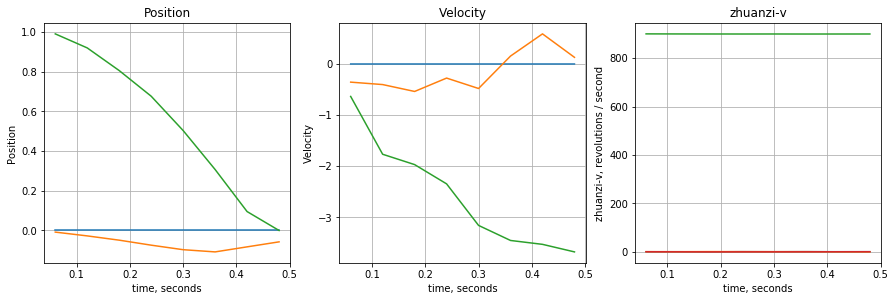

In [3]:
#coding:utf-8
plot_show(results)
path = [[results['x'][i], results['y'][i], results['z'][i]] for i in range(len(results['x']))]

In [ ]:
show_path(path, target=target_pos)

## 绘制阶段奖励

请绘制智能体在每个阶段中获得的总奖励，这可以是单次运行的奖励值，也可以是多次运行的平均值。

In [1]:
## TODO: Plot the rewards.
plt.title('Reward')
plt.plot(plot_data['episode'], plot_data['total_reward'], label='reward')

plt.xlabel('episode, times')
plt.ylabel('reward')
plt.grid(True)


NameError: name 'plt' is not defined

In [15]:
plot_data['total_reward'][-10:]
np.mean(plot_data['total_reward'][-10:])

290.86632266555654

## 回顾

**问题 1**：请描述你在 `task.py` 中指定的任务。你如何设计奖励函数？

**回答**：
         
        #get_reward： 
        #给向上速度奖励同时对左右速度给与一定的惩罚。
        
        reward_vzxy = self.sim.v[2]*1.3-self.sim.v[1]*0.2-self.sim.v[0]*0.2
                
        #对不在目标位置z惩罚
        
        reward_z = -(abs(self.sim.pose[2] - self.target_pos[2]))
               
        #对不在目标位置x，y惩罚
        reward_x = -(abs(self.sim.pose[0] - self.target_pos[0]))*0.8
        
        reward_y = -(abs(self.sim.pose[1] - self.target_pos[1]))*0.8
       
        # 让变化角度变得平滑
        
        reward_ang= -(abs(self.sim.angular_v[:3])).sum()*0.8
        
        return reward_vzxy+reward_z+reward_x+reward_y+reward_ang-1.0
        
        #step：
            # 设置向上飞的奖励
            if(self.sim.pose[2] >= self.target_pos[2]):
                reward +=100
                done = True      
       

**问题 2**：请简要描述你的智能体，你可以参考以下问题：

- 你尝试了哪些学习算法？哪个效果最好？
- 你最终选择了哪些超参数（比如 $\alpha$，$\gamma$，$\epsilon$ 等）？
- 你使用了什么样的神经网络结构（如果有的话）？请说明层数、大小和激活函数等信息。

**回答**：   
        1\使用的是DDPG学习算法。   
        2\超参数：Learning_rate = 0.00005,gamma=0.99,num_episodes=1500,buffer_size = 100000,batch_size = 128.   
        3\actor神经网络结构是32*64*32,每层以relu激活函数输出然后加上batchnormal和dropout，输出以sigmod为激活函数;
        critic神经网络分为state和action两部分，两部分的结构都为32*64*32,每层以relu激活函数输出然后加上batchnormal和dropout，输出以relu为激活函数;
        

**问题 3**：根据你绘制的奖励图，描述智能体的学习状况。

- 学习该任务是简单还是困难？
- 该学习曲线中是否存在循序渐进或急速上升的部分？
- 该智能体的最终性能有多好？（比如最后十个阶段的平均奖励值）

**回答**：    
1、
    - 该学习任务难在前期入手方面，一开始接触有点不知从何下手，我是通过逛论坛的方式才明白如何入手。   
    - 至于后来的参数调节由于需要同时调节agent和task的reward部分，有时不知道是哪里除了原因，一开始浪费很多时间。最后是通过先确定task不动，观察和调节agent参数，查看reward是否发生变化。最后在此基础上在微调四轴参数。可能是我以前玩过四轴所以task部分有蜜汁自信。   
2、学习曲线存在急速上升的部分。由reward中看出在500多阶时，agent突然学习到了如何达到目标位置。   
3、最后十个阶段平均值为290.86，并且从900阶后就一直稳定在这附近，这说明智能体的性能和网络的性能都比较不错。

**问题 4**：请简要总结你的本次项目经历。你可以参考以下问题：

- 本次项目中最困难的部分是什么？（例如开始项目、运行 ROS、绘制、特定的任务等。）
- 关于四轴飞行器和你的智能体的行为，你是否有一些有趣的发现？

**回答**：   
1、在问题一中回答了，本次项目最难的实在入手阶段，一旦入手了能否解决只是时间问题。   
2、一开始我曾尝试去控制转子速度，后来一想就发现违背训练的初衷。我们训练智能体的目的不就是想要给它一个目标让它自己想办法到达。      
3、还有个比较有趣的是，为什么智能体会突然性的学会起飞？这和生活中的某些学习行为很相似，比如我学习独轮平衡车，也是学了一个礼拜，在某一时刻突然顿悟的。。。   
